In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Changing directory to top folder (All programs run from top)
import os
os.chdir('/Users/nschumacher/docs/galvanize/smunch-user-food-analysis')

## Importing local file for viewing feature importances
from model.feature_importance import *

%matplotlib inline  
%config InlineBackend.figure_format='retina'

In [7]:
## Load in the data
X = pickle.load(open('model/X_features.p', 'rb'))
y = pickle.load(open('model/y_target.p', 'rb'))
features = pickle.load(open('model/feature_cols.p', 'rb'))

## Split and fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=43)

model = pickle.load(open('model/rf_model.p', 'rb'))
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=100,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [10]:
## Calculate the permutation importances of the features
f_imps = permutation_importance(model, X_test, y_test)

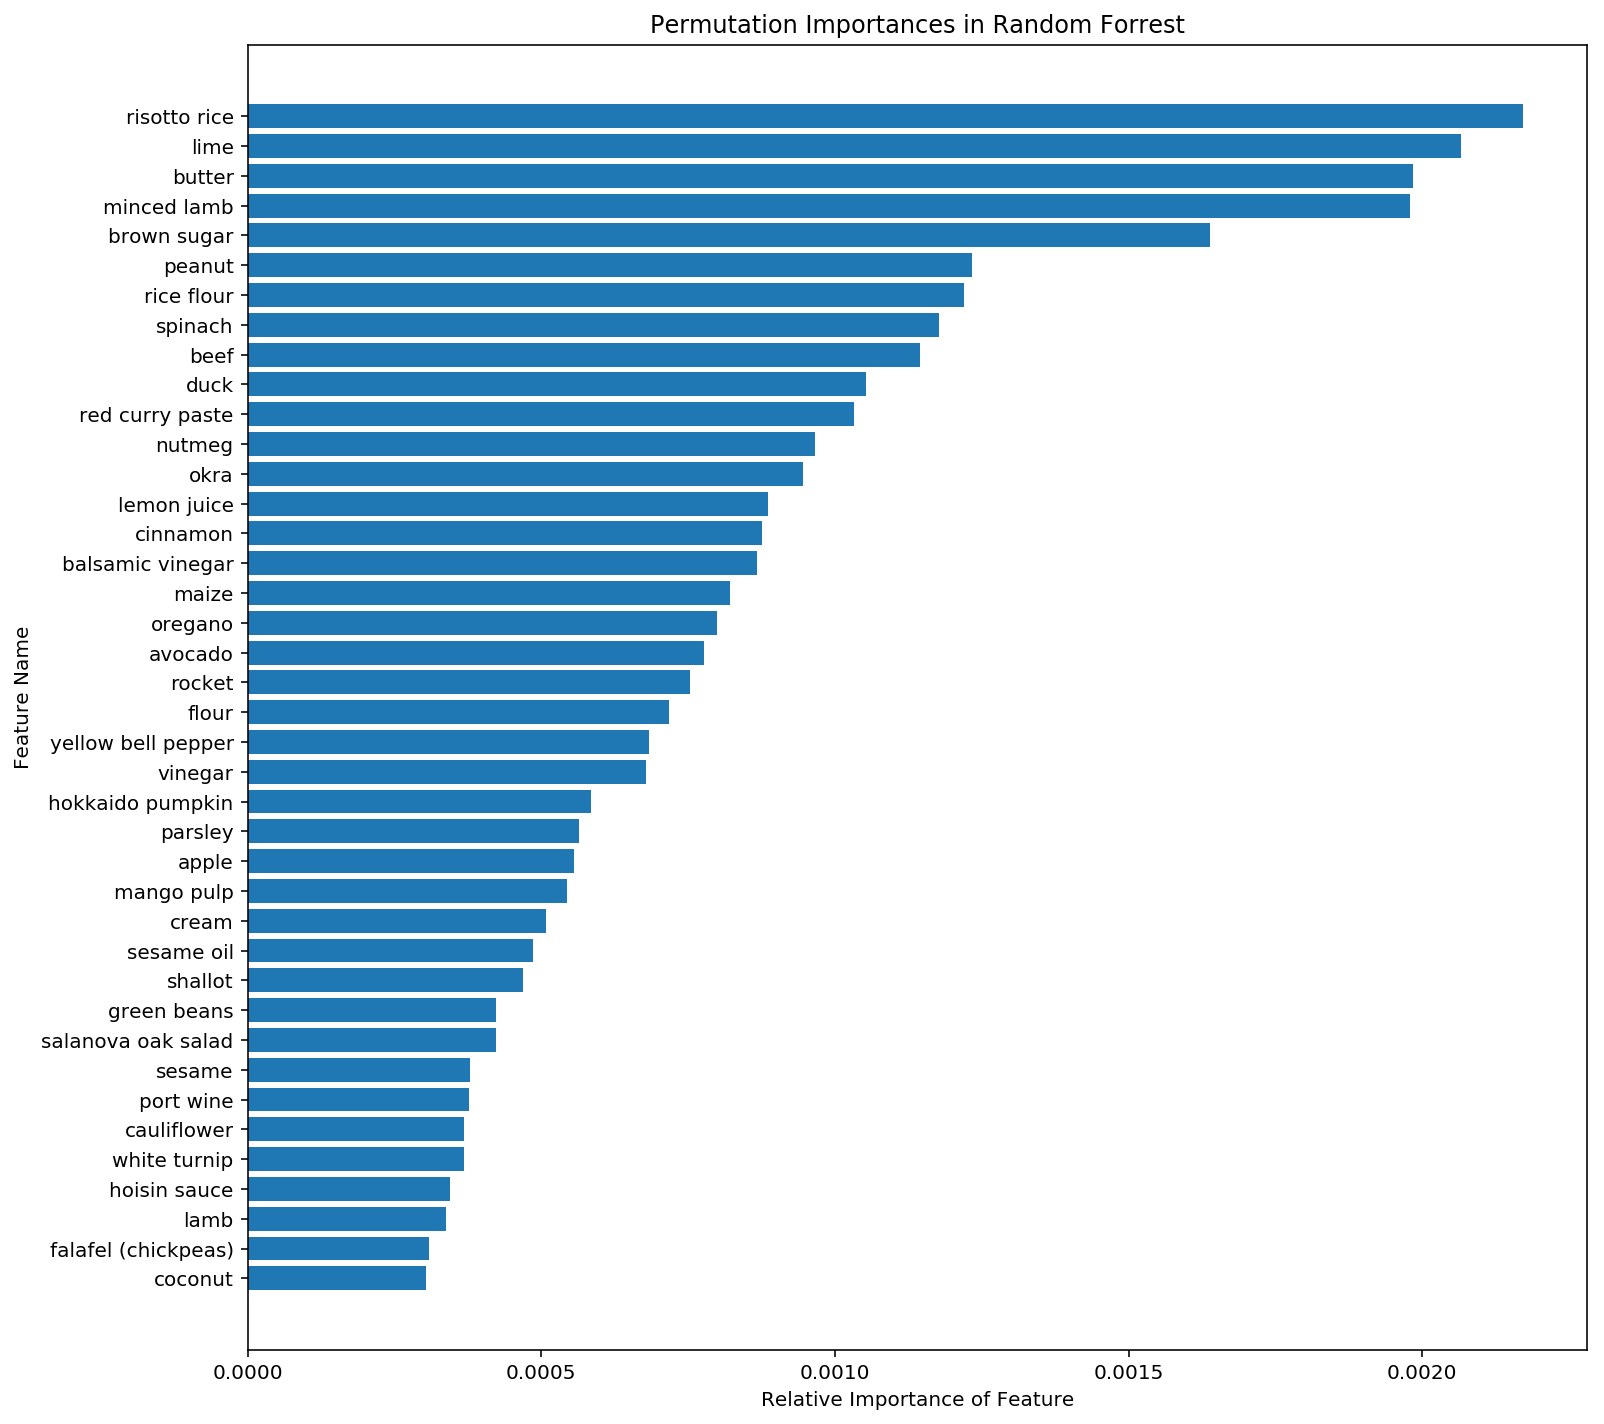

In [14]:
## Plot n importances
plt.figure(figsize=(12,12))
plot_perm_import(f_imps, np.array(features), 40)

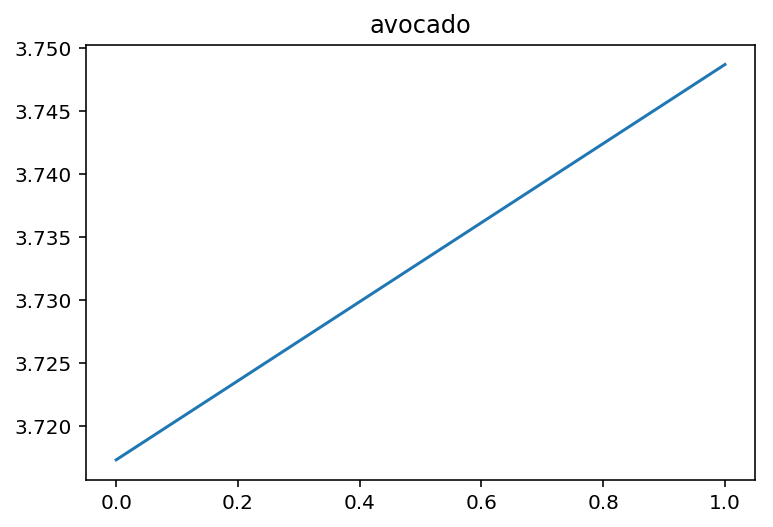

In [15]:
## Plot rating partial dependence on feature
plot_partial_dependence(model, X_train, features, 'avocado')